 # Predicting Diabetes

In [1]:
from path import Path
import pandas as pd

In [3]:
data = Path('Resources/diabetes.csv')
df = pd.read_csv(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 ## Separate the Features (X) from the Target (y)

In [4]:
y = df["Outcome"]
X = df.drop(columns="Outcome")

 ## Split our data into training and testing

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(576, 8)

 ## Create a Logistic Regression Model

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

 ## Fit (train) or model using the training data

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

 ## Make predictions

In [8]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7760416666666666


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[113  12]
 [ 31  36]]


In [12]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



#### Calculate Sensitivity/Recall<br/>
**Sensitivity = TP / (TP + FN)**

In [13]:
113 / (113 + 12)

0.904

#### Calculate Precision<br/>
**Precision = TP / (TP + FP)**

In [15]:
113 / (113 + 31)

0.7847222222222222

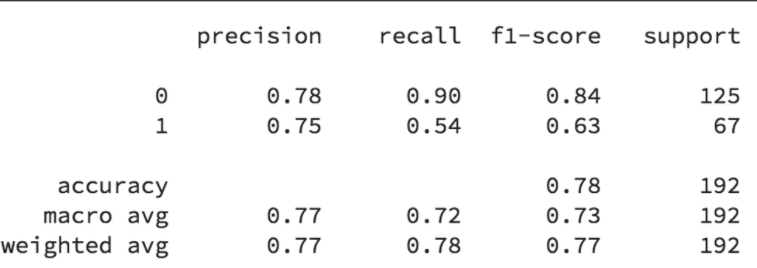

The precision for prediction of the nondiabetics and diabetics are in line with each other. However, the recall (sensitivity) for predicting diabetes is much lower than it is for predicting an absence of diabetes. The lower recall for diabetics is reflected in the dropped F1 score as well.